In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import os 
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
da=pd.read_csv('loan_data (1).csv')
da.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# EDA

In [3]:
da.shape

(9578, 14)

In [4]:
da.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
da.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
da.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

Persons paid= 0
Persons not paid =1

In [7]:
da['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [8]:
da['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [9]:
da['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [10]:
da['pub.rec'].value_counts()

0    9019
1     533
2      19
3       5
4       1
5       1
Name: pub.rec, dtype: int64

# Bivariate Analysis

Text(0.5, 0, 'FICO')

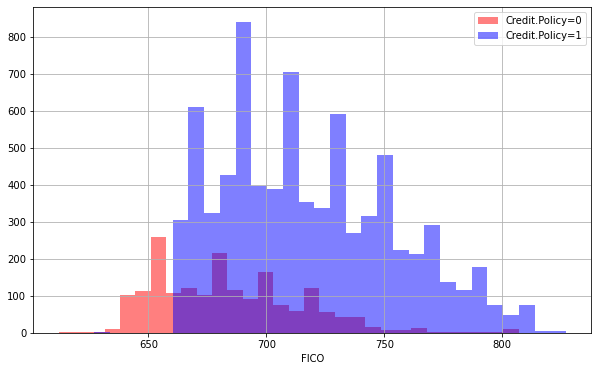

In [72]:
plt.figure(figsize=(10,6))
da[da['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')

da[da['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
plt.legend()
plt.xlabel('FICO')

# The FICO is credit score of the borrower.

Text(0.5, 0, 'FICO')

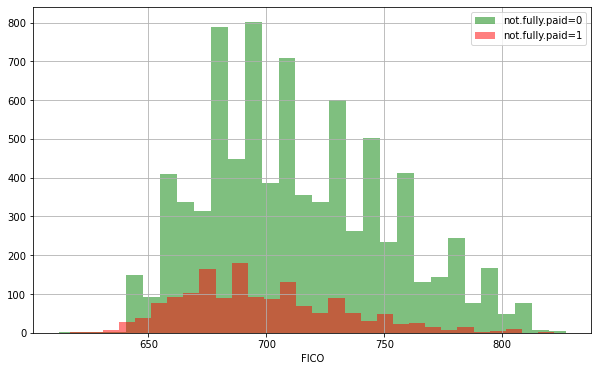

In [71]:
plt.figure(figsize=(10,6))
da[da['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='green',bins=30,label='not.fully.paid=0')

da[da['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=1')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

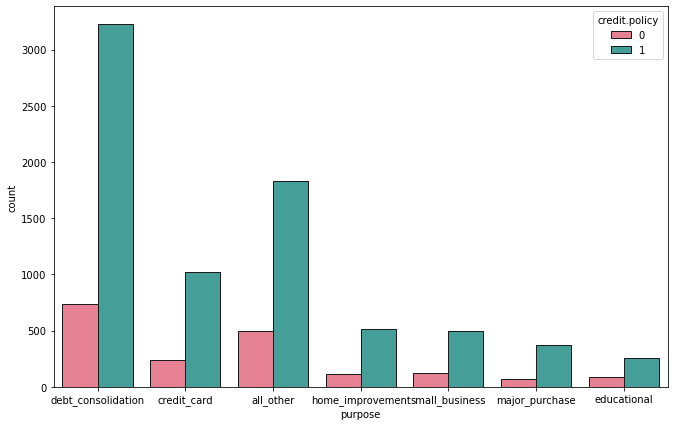

In [86]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='credit.policy',data=da,palette='husl',edgecolor='.1')

Let's see the trend between FICO score and interest rate. Recreate the following jointplot.

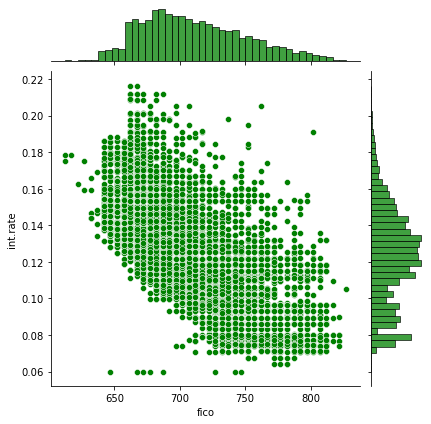

In [14]:
sns.jointplot(x='fico',y='int.rate',data=da,color='green')

<Figure size 792x504 with 0 Axes>

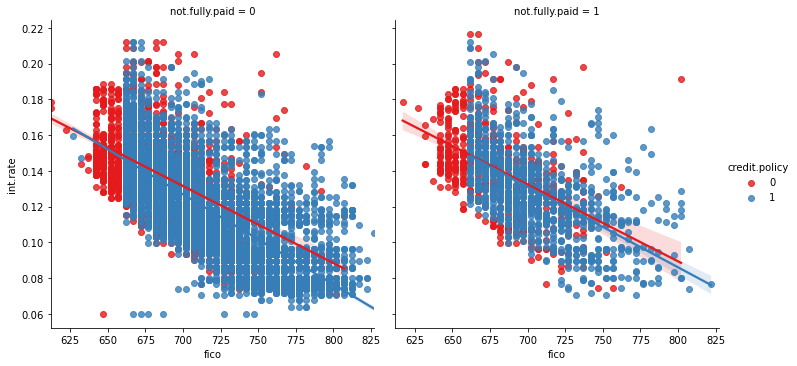

In [75]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=da,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

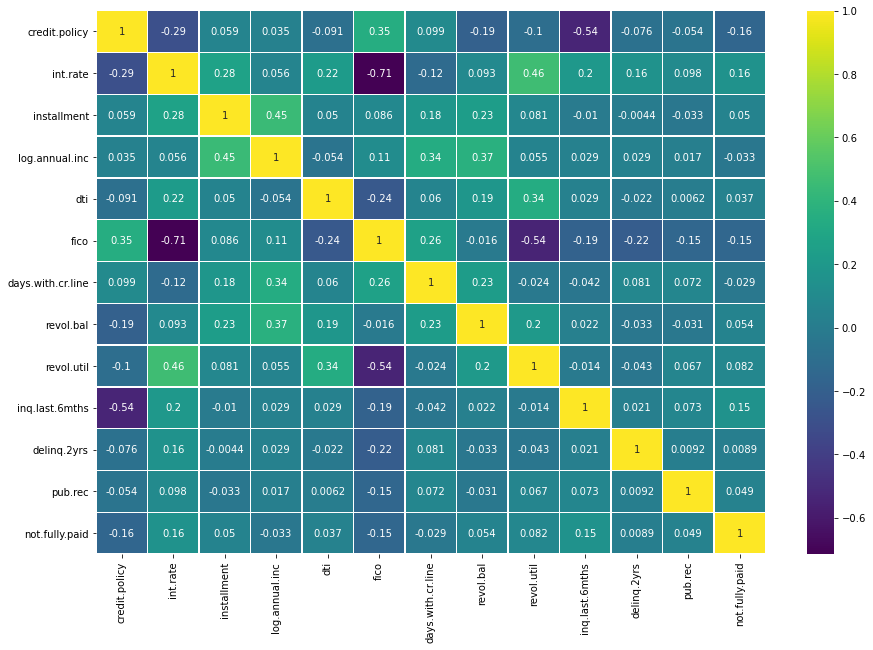

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(da.corr(),annot=True,linewidth=.4,cmap='viridis')
plt.show()

In [16]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [17]:
purpose = da[['purpose']]
purpose= pd.get_dummies(purpose,drop_first=True)
purpose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   purpose_credit_card         9578 non-null   uint8
 1   purpose_debt_consolidation  9578 non-null   uint8
 2   purpose_educational         9578 non-null   uint8
 3   purpose_home_improvement    9578 non-null   uint8
 4   purpose_major_purchase      9578 non-null   uint8
 5   purpose_small_business      9578 non-null   uint8
dtypes: uint8(6)
memory usage: 56.2 KB


In [18]:
purpose.head()

,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [19]:
df=pd.concat([da,purpose],axis=1)
df.drop(['purpose'],axis=1,inplace=True)
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = df.drop('credit.policy',axis=1)
y = df['credit.policy']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2020)

# Decision Tree Model Implementation

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Entropy

In [45]:
classifier_en= DecisionTreeClassifier(criterion='entropy')
classifier_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
classifier.score(x_train, y_train)

1.0

In [46]:
classifier_en.score(x_test,y_test)

0.9879958246346555

# Gini

In [57]:
classifier1= DecisionTreeClassifier(criterion='gini')
classifier1.fit(x_train, y_train)

DecisionTreeClassifier()

In [58]:
classifier1.score(x_train, y_train)

1.0

In [59]:
classifier1.score(x_test,y_test)

0.9890396659707724

overall score of test data is same for both entropy and gini, but as gini is giving .1% better accuray, we will consider that one

# Random Forest Classifier Implementation

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
mo=RandomForestClassifier()

In [62]:
mo.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
mo.score(x_train,y_train)

1.0

In [64]:
predictions = mo.predict(x_test)

In [65]:
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [67]:
mo.score(x_test,y_test)

0.9838204592901879

Decision Tree and Random Forest both are giving best and almost same level of accuracies, so it totally fine to consider any of them